# Visualisation

## Display a random sample of images (Figure 1)

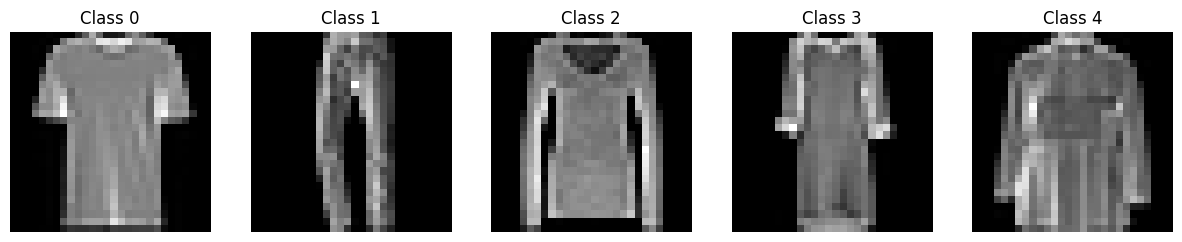

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_data = np.load('fashion_train.npy')

# Dictionary to store images for each class
class_images = {0: [], 1: [], 2: [], 3: [], 4: []}

# Iterate through the training data and separate images by class
for i in range(train_data.shape[0]):
    pixel_values = train_data[i, :-1]
    label = train_data[i, -1]
    image = pixel_values.reshape((28, 28))
    class_images[label].append(image)

# Plot images for each class
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axs[i].imshow(class_images[i][0], cmap='gray')
    axs[i].set_title(f'Class {i}')
    axs[i].axis('off')

plt.show()

## Principal component analysis

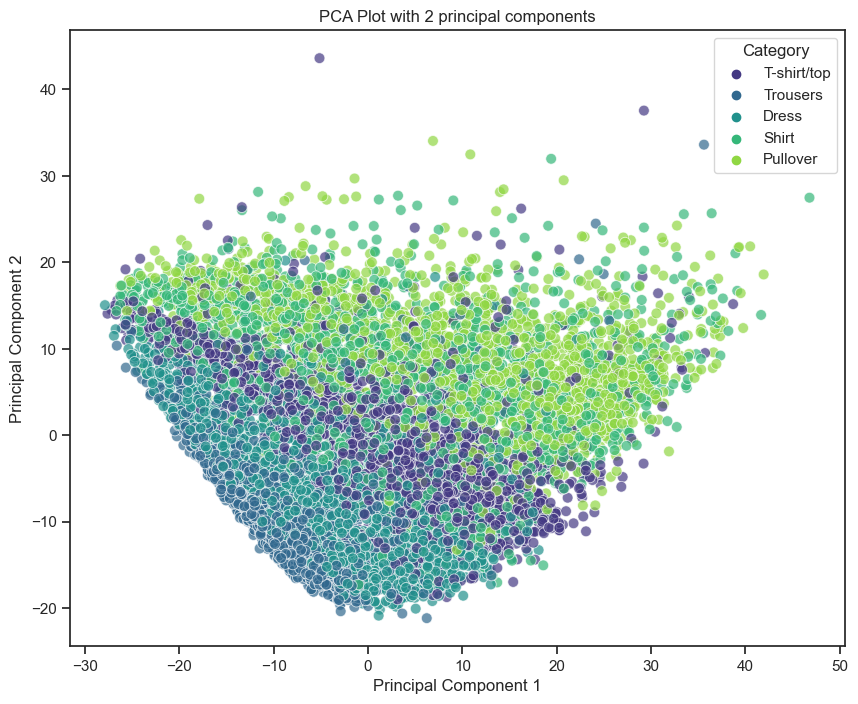

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels¨
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first two principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Category'] = y_train_strings

# Visualize the PCA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=pc_df, palette='viridis', s=60, alpha=0.7)
plt.title('PCA Plot with 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()


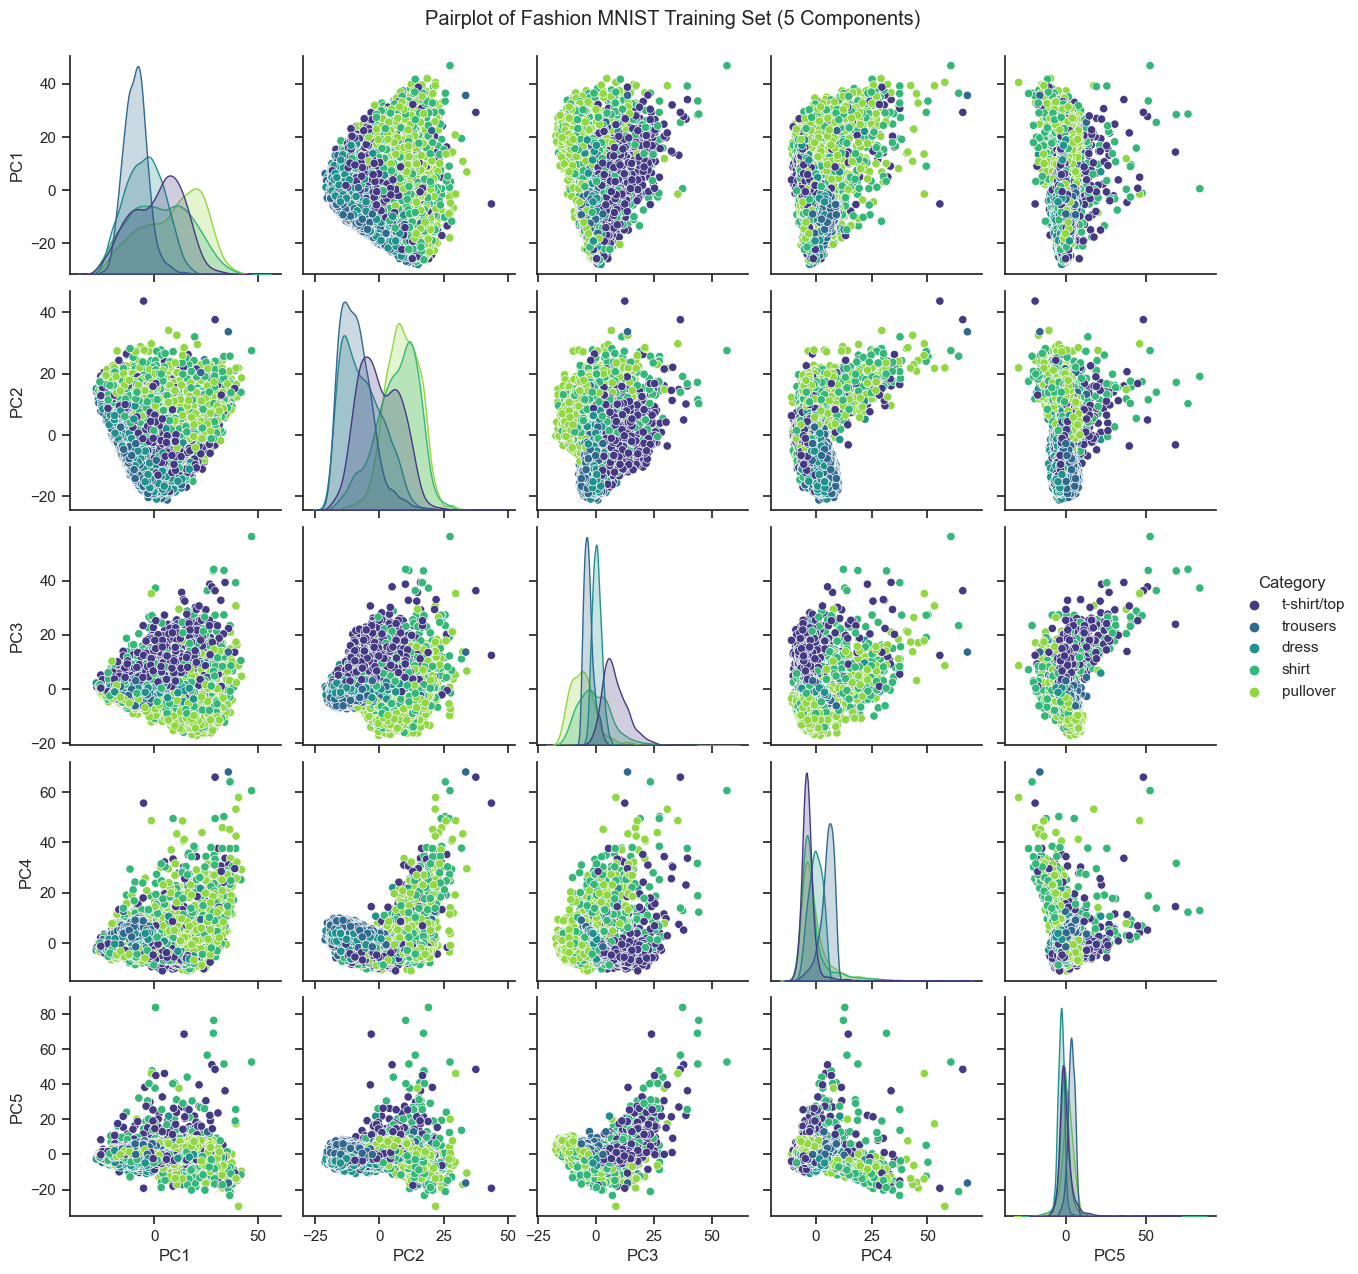

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "t-shirt/top", 1: "trousers", 2: "pullover", 3: "dress", 4: "shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first five principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Category'] = y_train_strings

# Visualize the pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(pc_df, hue='Category', palette='viridis', markers='o', diag_kind='kde')
plt.suptitle('Pairplot of Fashion MNIST Training Set (5 Components)', y=1.02)
plt.show()


## Linear Discriminant Analysis

/var/folders/db/g8ybps0x5r16l6bpwz6pb8440000gn/T/ipykernel_28129/704831065.py:44: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


        LD1       LD2     Category
0 -0.018059  0.002138  T-shirt/top
1  0.059630 -0.013965     Trousers
2 -0.011862  0.001460  T-shirt/top
3  0.002350  0.009344        Dress
4 -0.000875 -0.008360        Shirt


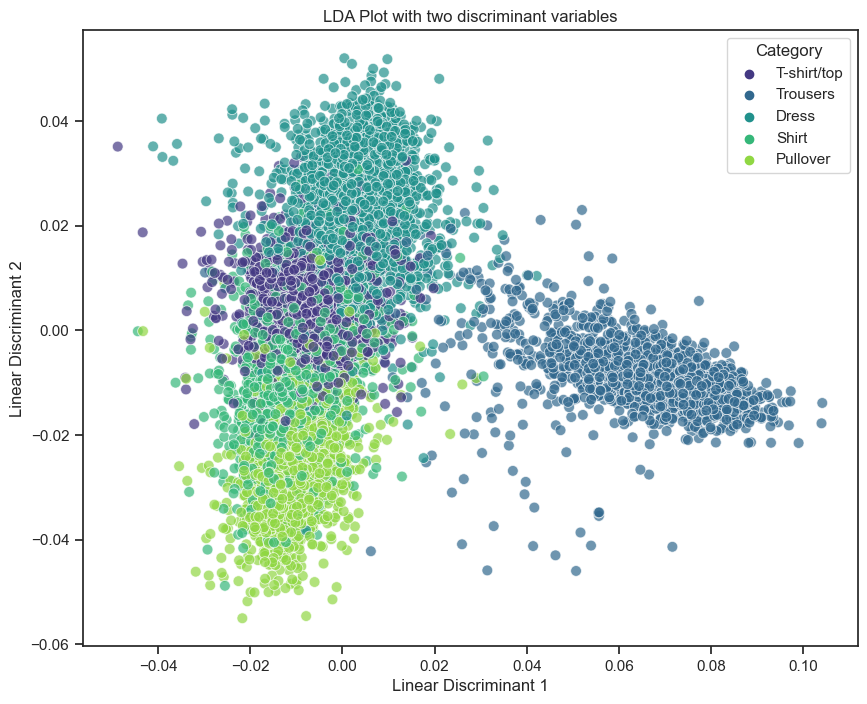

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def lda(X, y, num_components=2):
    """
    Linear Discriminant Analysis (LDA) implementation.

    Parameters:
    - X: Feature matrix (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to keep

    Returns:
    - lda_components: Linear discriminant components (n_features, num_components)
    - explained_variance: Explained variance by each linear discriminant component
    """

    classes = np.unique(y)
    num_classes = len(classes)
    num_features = X.shape[1]

    # Compute class means
    class_means = np.array([np.mean(X[y == c], axis=0) for c in classes])

    # Compute overall mean
    overall_mean = np.mean(X, axis=0)

    # Compute between-class scatter matrix
    between_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        n = len(y[y == c])
        mean_diff = class_means[c] - overall_mean
        between_class_scatter += n * np.outer(mean_diff, mean_diff)

    # Compute within-class scatter matrix
    within_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        class_data = X[y == c]
        mean_diff = class_data - class_means[c]
        within_class_scatter += np.dot(mean_diff.T, mean_diff)

    # Solve the generalized eigenvalue problem for (S_w)^(-1) * S_b
    eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top num_components eigenvectors
    lda_components = eigenvectors[:, :num_components]

    # Compute explained variance
    explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)

    return lda_components, explained_variance

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Apply LDA to the data
lda_components, explained_variance = lda(X_train, y_train, num_components=2)

# Project the data onto the first two linear discriminant components
lda_projection = np.dot(X_train, lda_components)

# Create a DataFrame with the linear discriminant components and labels
lda_df = pd.DataFrame(data=lda_projection, columns=['LD1', 'LD2'])
lda_df['Category'] = y_train_strings

print(lda_df.head())

# Visualize the LDA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Category', data=lda_df, palette='viridis', s=60, alpha=0.7)
plt.title('LDA Plot with two discriminant variables')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

# Classification

## Naive Bayes Classifier

## Second classifier

## Third classifier